In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = df.drop('medv',axis='columns')
y = df['medv']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


*** Random Forest ***
MAE = 2.086013157894737
MAPE = 0.1147511415523702


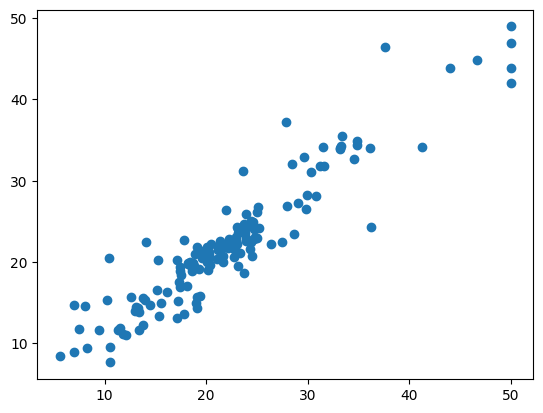

In [6]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

print("*** Random Forest ***")
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()



*** KNN Regression ***
MAE = 4.379166666666667
MAPE = 0.204092670602438


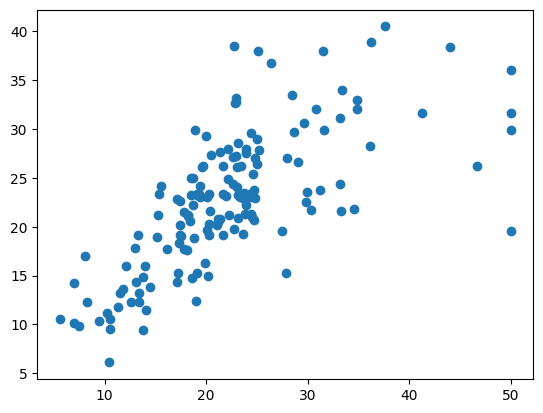

In [7]:
print("*** KNN Regression ***")
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

In [8]:
print("*** Linear Regression ***")
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))

*** Linear Regression ***
MAE = 3.3943554388631023
MAPE = 0.17731484756041418


In [11]:
X_train.shape[1]

13

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Input

input_shape = (X_train.shape[1],)
model = Sequential([
Input(shape=input_shape),
Dense(100, activation="relu"),
Dense(100, activation="relu"),
Dense(1, activation="linear")
])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,601 (45.32 KB)

 Trainable params: 11,601 (45.32 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from keras.callbacks import EarlyStopping
model.compile(loss='mse', optimizer='adam')
es = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)#, callbacks=[es])


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 516.8727 - val_loss: 206.4984
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 251.0002 - val_loss: 202.1687
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 141.1071 - val_loss: 72.6663
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120.3220 - val_loss: 54.9262
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.1667 - val_loss: 47.2729
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.9371 - val_loss: 41.1349
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 68.0833 - val_loss: 43.7799
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71.3635 - val_loss: 47.1847
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70.6052 - val_loss: 45.9136
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.4851 - val_loss: 42.5178
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 73.3194 - val_loss: 38.8809
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

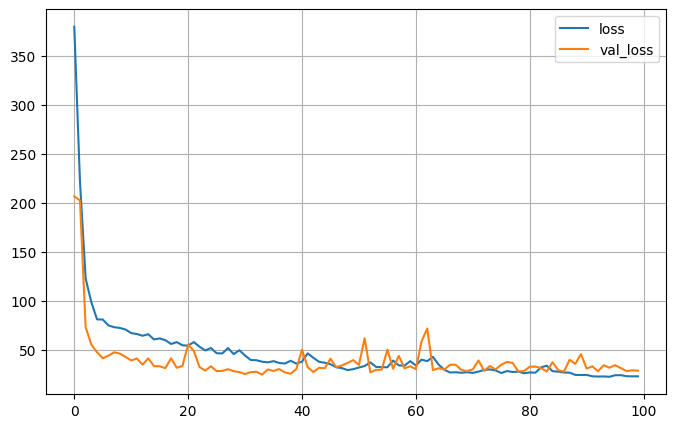

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [17]:
y_pred = model.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
MAE = 3.6434244874668744
MAPE = 0.16514159636755132
